<a href="https://colab.research.google.com/github/gustavo-plc/PyStatistics/blob/main/AEDI_T4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NOTEBOOK DESTINADO A REGISTRAR AS TAREFAS DA DISCIPLINA DE AEDI - 1º/2025
### PROFESSOR: JOÃO GABRIEL DE MORAES SOUZA
### ALUNO: GUSTAVO PARREIRA LIMA CUNHA

# **TAREFA 4 - REGRESSÃO LINEAR**

### Questão A - Modelagem do preço de venda

Path to dataset files: /kaggle/input/ames-housing-dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bl

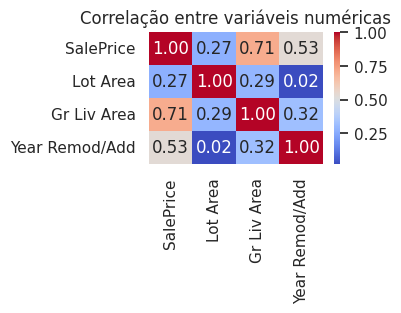

In [6]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Baixar dataset
path = kagglehub.dataset_download("prevek18/ames-housing-dataset")
print("Path to dataset files:", path)

# leitura do arquivo
csv_path = os.path.join(path, "AmesHousing.csv")
df = pd.read_csv(csv_path)

# Análise exploratória: explorar algumas variáveis e como elas se relacionam com o preço de venda.

print(df.info())

# Correlação numérica entre as variáveis

plt.subplot(2, 2, 4)
correlation = df[["SalePrice", "Lot Area", "Gr Liv Area", "Year Remod/Add"]].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre variáveis numéricas")

plt.tight_layout()
plt.show()

A partir da matriz de correlação entre as variáveis, foi constatado que, contrariamente à hipótese de que o preço de venda era altamente impactado pela área do lote, essas variáveis não se mostraram fortemente correlacionadas. Portanto, será levada adiante a análise somente entre o preço de venda e a área construída (Gr Liv Area) e o ano de reforma ou ampliação.

Coeficiente linear (Área construída): 13289.63
Coeficiente angular (Área construída): 111.69

Coeficiente linear (Ano de última reforma/ampliação): -3869250.53
Coeficiente angular (Ano de última reforma/ampliação): 2041.08


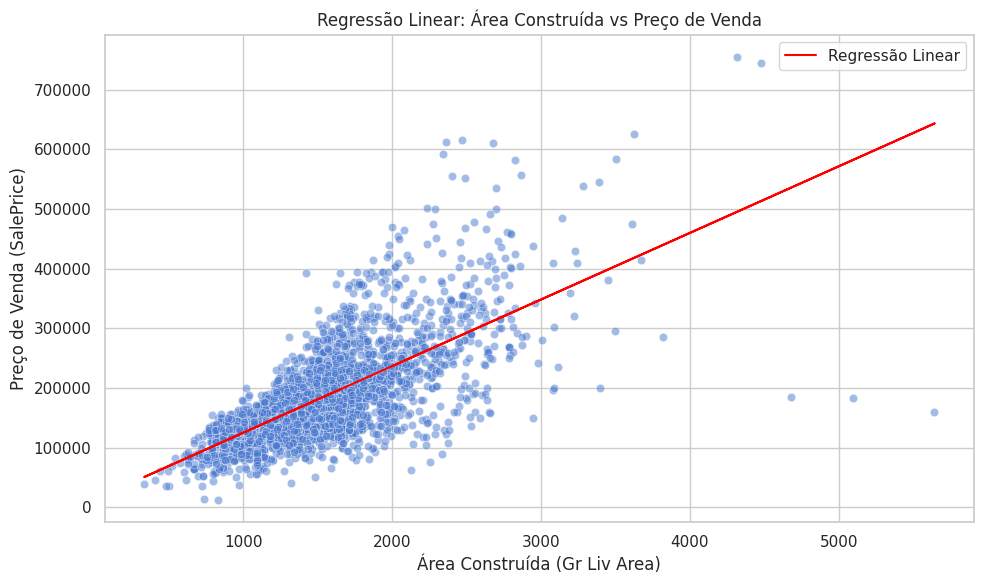

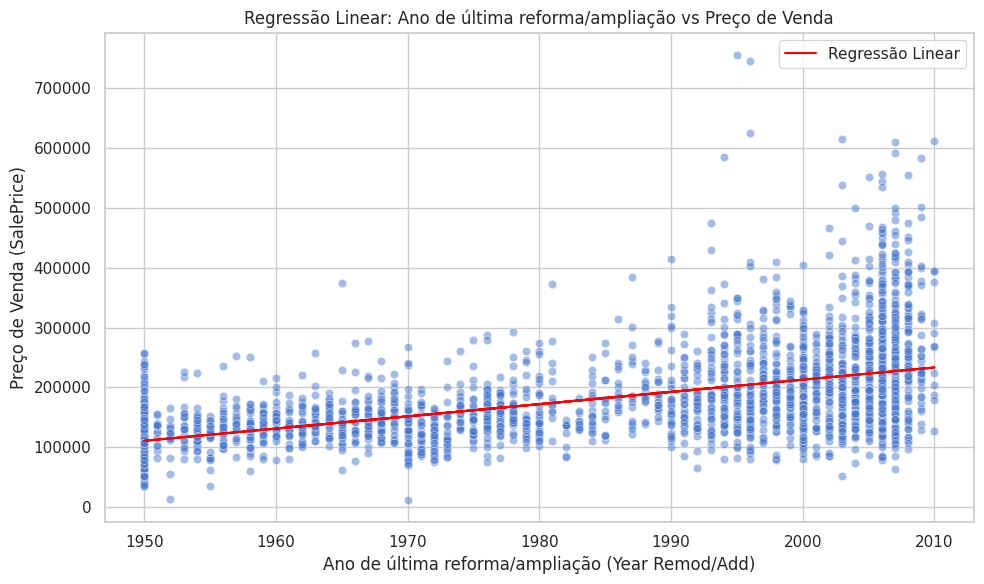

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np

# tratamento de dados
# Remover valores nulos
df_clean = df[["Gr Liv Area", "SalePrice"]].dropna()
df_clean2 = df[["Year Remod/Add", "SalePrice"]].dropna()

# Variáveis
X1 = df_clean[["Gr Liv Area"]] #variável explicativa
y1 = df_clean["SalePrice"] # variável dependente

X2 = df_clean2[["Year Remod/Add"]] #variável explicativa

# Modelo de regressão
model1 = LinearRegression()
model1.fit(X1, y1)

model2 = LinearRegression()
model2.fit(X2, y1)

# Coeficientes
intercept = model1.intercept_
slope = model1.coef_[0]
r2 = model1.score(X1, y1)

intercept2 = model2.intercept_
slope2 = model2.coef_[0]
r22 = model2.score(X2, y1)

print(f"Coeficiente linear (Área construída): {intercept:.2f}")
print(f"Coeficiente angular (Área construída): {slope:.2f}")
print()
print(f"Coeficiente linear (Ano de última reforma/ampliação): {intercept2:.2f}")
print(f"Coeficiente angular (Ano de última reforma/ampliação): {slope2:.2f}")

# Gráfico 1
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Gr Liv Area", y="SalePrice", data=df_clean, alpha=0.5)
plt.plot(df_clean["Gr Liv Area"], model1.predict(X1), color='red', label='Regressão Linear')

plt.title("Regressão Linear: Área Construída vs Preço de Venda")
plt.xlabel("Área Construída (Gr Liv Area)")
plt.ylabel("Preço de Venda (SalePrice)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#gráfico 2
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Year Remod/Add", y="SalePrice", data=df_clean2, alpha=0.5)
plt.plot(df_clean2["Year Remod/Add"], model2.predict(X2), color='red', label='Regressão Linear')

plt.title("Regressão Linear: Ano de última reforma/ampliação vs Preço de Venda")
plt.xlabel("Ano de última reforma/ampliação (Year Remod/Add)")
plt.ylabel("Preço de Venda (SalePrice)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Aparentemente, o gráfico da regressão linear indica que essa variável, apesar de apresentar boa correlação com o preço de venda, não é boa para gerar um modelo de previsão de preço de venda a partir dela, especialmente por ter valores discretos (anos). Para testar isso, será utilizado o coeficiente de determinação, que avalia o quão bem o modelo de regressão consegue prever ou explicar os valores observados.

In [14]:
from sklearn.linear_model import LinearRegression

print(f"R² da regressão: {r22:.4f}")


R² da regressão: 0.2841


O valor do coeficiente de determinação obtido foi significativo, o que indica que, apesar de visualmente a regressão apresentar comportamento questionável, a variável é numericamente relevante para a previsão do preço de venda. Portanto, manter-se-á sua utilização. O gráfico abaixo, que compara a média do preço de venda das casas de acordo com o ano de última reforma/ampliaçao, mostra melhor a relação entre as duas variáveis. A regressão, apesar de válida, foi visualmente frágil para mostrar essa relaçaõ.

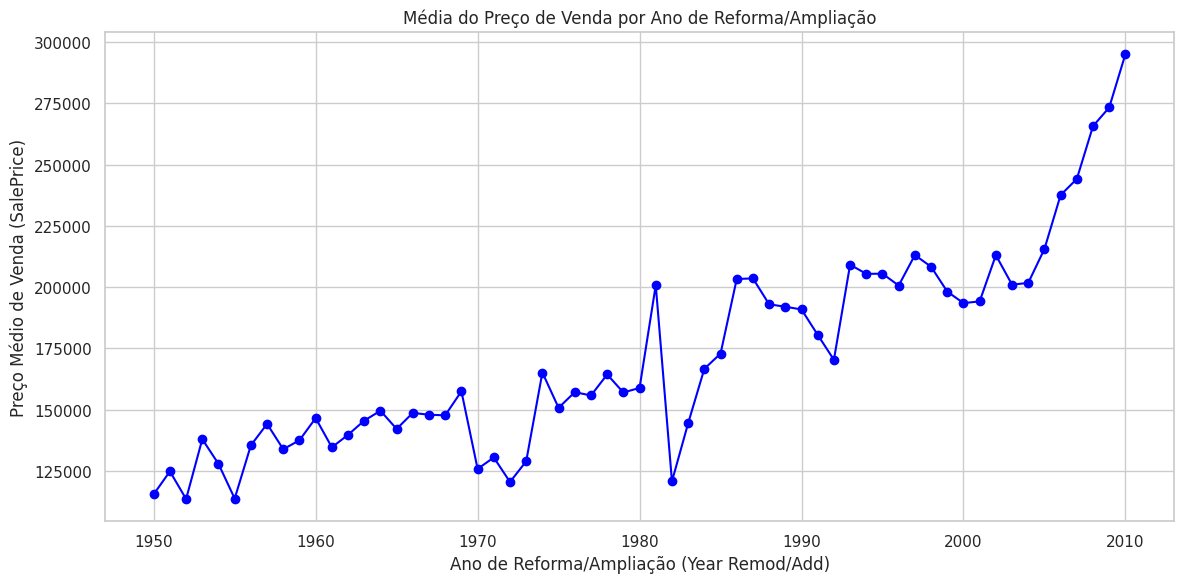

In [18]:
# Agrupar por ano de reforma e calcular a média do preço de venda
media_por_ano = df.groupby('Year Remod/Add')['SalePrice'].mean().reset_index()

# Plotar a linha de tendência
plt.figure(figsize=(12, 6))
plt.plot(media_por_ano['Year Remod/Add'], media_por_ano['SalePrice'], marker='o', color='blue')
plt.title('Média do Preço de Venda por Ano de Reforma/Ampliação')
plt.xlabel('Ano de Reforma/Ampliação (Year Remod/Add)')
plt.ylabel('Preço Médio de Venda (SalePrice)')
plt.grid(True)
plt.tight_layout()
plt.show()